In [1]:
from Calculators.GED_Calculator import build_GED_calculator, build_Heuristic_calculator, build_Randomwalk_GED_calculator
# from Calculators.Product_GRaphs import RandomWalkCalculator
from Dataset import Dataset
from Experiment import experiment
import sys
import os
import traceback

from Models.SVC.GED.hybrid_prototype_selector import HybridPrototype_GED_SVC
# add the current directory to the system path
sys.path.append(os.getcwd())
from Models.SVC.GED.RandomWalk_edit import Random_Walk_edit_accelerated, Random_walk_edit_SVC
from Models.SVC.WeisfeilerLehman_SVC import WeisfeilerLehman_SVC
from Models.Graph_Classifier import GraphClassifier
from Models.SVC.Baseline_SVC import VertexHistogram_SVC,EdgeHistogram_SVC, CombinedHistogram_SVC, NX_Histogram_SVC
from Models.Blind_Classifier import Blind_Classifier
from Models.Random_Classifer import Random_Classifier
from Models.KNN_Classifer import KNN
from Models.SVC.GED.Trivial_GED_SVC import Trivial_GED_SVC
from Custom_Kernels.GEDLIB_kernel import GEDKernel
from Calculators.Dummy_Calculator import Dummy_Calculator
from Calculators.Base_Calculator import Base_Calculator
from Calculators.GEDLIB_Caclulator import GEDLIB_Calculator
from Models.SVC.GED.GED_Diffu_SVC import DIFFUSION_GED_SVC, Diffusion_GED_new
from Models.SVC.GED.Zero_GED_SVC import ZERO_GED_SVC
from Models.SVC.GED.simiple_prototype_GED_SVC import Simple_Prototype_GED_SVC
from Models.SVC.Base_GED_SVC import Base_GED_SVC, set_global_ged_calculator
from Models.KNN.GEDLIB_KNN import GED_KNN, set_global_ged_calculator_KNN
from Models.KNN.feature_KNN import Feature_KNN
import pandas as pd
from io_Manager import IO_Manager


In [ ]:
from Calculators.GED_Calculator import load_exact_GED_calculator
from Models.SVC.random_walk import RandomWalk_SVC
from Run_helpers import set_global_ged_calculator_All


DATASET_NAME="BZR_MD"
PRELOAD_CALCULATORS=True
USE_NODE_LABELS=None
USE_EDGE_LABELS=None
GED_BOUND="Exact"  # "UpperBound-Distance", "Mean-Distance", "LowerBound-Distance"
def get_classifiers(ged_calculator):
    set_global_ged_calculator_KNN(ged_calculator)
    calculator_id = set_global_ged_calculator_All(ged_calculator)

    # return ZERO_GED_SVC(calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", selection_split="classwise",prototype_size=7, aggregation_method="sum",dataset_name=DATASET.name,selection_method="k-CPS")
    # return Random_walk_edit_SVC(ged_calculator=ged_calculator, ged_bound=GED_BOUND, decay_lambda=0.1, max_walk_length=-1, C=1.0,kernel_type="precomputed", class_weight='balanced')
    # random_walk_calculator = RandomWalkCalculator(ged_calculator=ged_calculator, llambda_samples=[0.005,0.01,0.03,0.05,0.1,0.2,0.45,0.89], dataset=DATASET,ged_method=GED_BOUND)
    # random_walk_calculator = build_Randomwalk_GED_calculator(ged_calculator=ged_calculator)
    # random_walk_calculator_id = random_walk_calculator.get_identifier_name()
    random_walk_calculator = build_Randomwalk_GED_calculator(ged_calculator=ged_calculator)
    # return [Random_Walk_edit_accelerated(calculator_id=calculator_id, ged_bound=GED_BOUND, decay_lambda=0.1, max_walk_length=-1, C=1.0,kernel_type="precomputed", class_weight='balanced', random_walk_calculator_id=random_walk_calculator.get_identifier_name())]
    # return Random_Walk_edit_accelerated(calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, decay_lambda=0.1, max_walk_length=-1, C=1.0,kernel_type="precomputed", class_weight='balanced',random_walk_calculator_id=random_walk_calculator_id)
    # return Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.1)
    # return  Simple_Prototype_GED_SVC(calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, C=1.0,kernel_type="poly", class_weight='balanced',prototype_size=8, selection_method="k-CPS", selection_split="all",dataset_name=DATASET_NAME)
    # return DIFFUSION_GED_SVC(C=0.5, llambda=0.05, calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, diffusion_function="exp_diff_kernel", class_weight='balanced', t_iterations=2)
    # return Diffusion_GED_new(C=0.5, llambda=0.05, calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, diffusion_function="exp_diff_kernel", class_weight='balanced', t_iterations=2)
    # return CombinedHistogram_SVC(kernel_type='precomputed')
    # return Feature_KNN(vector_feature_list=["VertexHistogram","density","Prototype-Distance"], dataset_name=DATASET.name, prototype_size=5, selection_split="all", selection_method="TPS", metric="minkowski", calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, n_neighbors=5, weights='uniform', algorithm='auto')
    return [
        VertexHistogram_SVC(kernel_type='precomputed'),
        WeisfeilerLehman_SVC(n_iter=3,C=1.0, normalize_kernel=True),
        # RandomWalk_SVC(normalize_kernel=True, rw_kernel_type="geometric",decay_lambda=0.05, p_steps=3,C=1.0, kernel_type="precomputed"),
        # Random_Walk_edit_accelerated(calculator_id=calculator_id, ged_bound=GED_BOUND, decay_lambda=0.5, max_walk_length=-1, C=1.0,kernel_type="precomputed", class_weight='balanced', random_walk_calculator_id=random_walk_calculator.get_identifier_name()),
        Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k1',llambda=0.5),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k2',llambda=0.5),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k3',llambda=0.5),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.5),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.01),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.005),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.025),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.125),
        # Trivial_GED_SVC(calculator_id=ged_calculator.get_identifier_name(),ged_bound=GED_BOUND, C=1.0,kernel_type="precomputed", class_weight='balanced',similarity_function='k4',llambda=0.8),
        DIFFUSION_GED_SVC(C=0.5, llambda=0.05, calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, diffusion_function="exp_diff_kernel", class_weight='balanced', t_iterations=2),
        # EdgeHistogram_SVC(kernel_type='precomputed'), 
        # RandomWalk_SVC(normalize_kernel=True, rw_kernel_type="geometric", p_steps=3,C=1.0, kernel_type="precomputed"),
        # WeisfeilerLehman_SVC(n_iter=5,C=1.0, normalize_kernel=False),
        # VertexHistogram_SVC(kernel_type='precomputed'),
        # DIFFUSION_GED_SVC(C=0.5, llambda=0.9, calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, diffusion_function="exp_diff_kernel", class_weight='balanced', t_iterations=5),
        Random_Walk_edit_accelerated(calculator_id=calculator_id, ged_bound=GED_BOUND, decay_lambda=0.05, max_walk_length=2, C=1.0,kernel_type="precomputed", class_weight='balanced', random_walk_calculator_id=random_walk_calculator.get_identifier_name()),
            ]


kernel_names = [
    "VH",
    "WL-ST depth 3",
    # "RW geo. λ = 0.05, walk length = 3",
    "Triv-GED k1,  λ = 0.5",
    # "Trivial_GED_SVC_k2",
    # "Trivial_GED_SVC_k3",
    # "Trivial_GED_SVC_k4",
    # "Trivial_GED_SVC_k4_llambda_0.01",
    # "Trivial_GED_SVC_k4_llambda_0.005",
    # "Trivial_GED_SVC_k4_llambda_0.025",
    # "Trivial_GED_SVC_k4_llambda_0.125",
    # "Trivial_GED_SVC_k4_llambda_0.8",
    "Diff-GED t=2  λ = 0.05",
    # "EdgeHistogram_SVC",
    # "RandomWalk_SVC_geometric_p3",
    # "WeisfeilerLehman_SVC_no_normalize",
    # "VertexHistogram_SVC",
    # "DIFFUSION_GED_SVC_t5",
    "RWE λ = 0.05, walk length = 2",
]


def get_Dataset(ged_calculator,name=DATASET_NAME):
    DATASET= Dataset(name=name,ged_calculator=ged_calculator, use_node_labels=USE_NODE_LABELS, use_edge_labels=USE_EDGE_LABELS,load_now=False,use_node_attributes=None, use_edge_attributes=None)
    DATASET.load()
    return DATASET, DATASET.get_calculator()

if PRELOAD_CALCULATORS:
    ged_calculator = "Exact_GED"
else:
    ged_calculator = load_exact_GED_calculator(f"{DATASET_NAME}_{int(USE_NODE_LABELS is not None)}_{int(USE_EDGE_LABELS is not None)}")
    # ged_calculator = lambda dataset, labels: build_GED_calculator(GED_edit_cost="CONSTANT", GED_calc_methods=[("IPFP","upper")], dataset=dataset, labels=labels,dataset_name=DATASET_NAME, need_node_map=True)
DATASET, ged_calculator = get_Dataset(ged_calculator=ged_calculator, name=DATASET_NAME)
set_global_ged_calculator(ged_calculator)

Loading BZR_MD into NetworkX from Datasets/TUD/BZR_MD...
Loaded 137734 edges.
Loaded 6519 node-to-graph mappings.
Loaded 306 graph labels.


Converting graphs to NetworkX format: 100%|██████████| 306/306 [00:00<00:00, 3333654.61it/s]


Converted 306 graphs to NetworkX format.
Now setting up the Calculator
Loading the presaved Exact_GED for dataset BZR_MD
Loading Exact_GED_Calculator for BZR_MD_0_0...


In [3]:
# Matplotlib function to display a Heatmap
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

# Matplotlib function to display a Heatmap
import matplotlib.pyplot as plt

def display_heatmap(heatmap, title="Heatmap", xlabel="Graphs", ylabel="Graphs", figsize=(20, 16),
                    highlight_rows=None, highlight_cols=None, highlight_color='red', alpha=0.25, linewidth=0):
    """
    Display a heatmap and optionally highlight full rows or columns.
    - heatmap: 2D array-like (if 1D, it will be treated as a single row).
    - highlight_rows: iterable of row indices to highlight (indices relative to the displayed matrix).
    - highlight_cols: iterable of column indices to highlight.
    - highlight_color: fill color for highlights.
    - alpha: transparency for highlights.
    - linewidth: border width for highlight rectangles (0 = no border).
    Returns the matplotlib Axes.
    """
    arr = np.array(heatmap)
    # Ensure 2D for seaborn (treat 1D as single row)
    if arr.ndim == 1:
        arr = arr[np.newaxis, :]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(arr, annot=False, cmap='viridis', cbar=True)
    nrows, ncols = arr.shape

    # Add translucent rectangles to highlight full rows
    if highlight_rows is not None:
        for r in highlight_rows:
            if 0 <= r < nrows:
                rect = Rectangle((0, r), ncols, 1, facecolor=highlight_color, alpha=alpha, linewidth=linewidth, edgecolor='black' if linewidth>0 else None)
                ax.add_patch(rect)

    # Add translucent rectangles to highlight full columns
    if highlight_cols is not None:
        for c in highlight_cols:
            if 0 <= c < ncols:
                rect = Rectangle((c, 0), 1, nrows, facecolor=highlight_color, alpha=alpha, linewidth=linewidth, edgecolor='black' if linewidth>0 else None)
                ax.add_patch(rect)

    ax.set_title(title, fontsize=25)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    plt.show()
    return ax
def display_heatmaps(heatmaps, titles=None, figsize_per=(6, 7), share_color=True, cmap='viridis',
                        annot=False, highlight_rows=None, highlight_cols=None,
                        highlight_color='red', alpha=0.25, linewidth=0,col_wrap=4):
    """
    Display multiple heatmaps side-by-side.
    - heatmaps: list of 2D arrays (or 1D arrays will be treated as single-row).
    - titles: list of titles (len must match heatmaps) or None.
    - figsize_per: (width, height) per subplot; total figsize = (width * ncols, height).
    - share_color: if True use the same vmin/vmax across all heatmaps and show a single colorbar on the last plot.
    - highlight_rows / highlight_cols: either
        - None
        - a single iterable of indices to apply to all heatmaps
        - a list/tuple with length == len(heatmaps) providing per-heatmap highlights
    Returns (fig, axes).
    """
    def _resolve_param(param, idx, n):
        if param is None:
            return None
        try:
            if len(param) == n:
                return param[idx]
        except TypeError:
            pass
        return param

    n = len(heatmaps)
    if n == 0:
        raise ValueError("heatmaps list is empty")

    # prepare arrays and ensure 2D
    arrays = []
    for h in heatmaps:
        arr = np.array(h)
        if arr.ndim == 1:
            arr = arr[np.newaxis, :]
        arrays.append(arr)

    # compute shared color limits if requested
    if share_color:
        all_min = min(arr.min() for arr in arrays)
        all_max = max(arr.max() for arr in arrays)
        vmin, vmax = all_min, all_max
    else:
        vmin = vmax = None
    n_plots = len(heatmaps)
    n_cols = min(max(1, col_wrap), n_plots)
    n_rows = math.ceil(n_plots / n_cols)
    fig, axes = plt.subplots(1, n, figsize=(figsize_per[0] * n, figsize_per[1]), squeeze=False)
    axes = axes.flatten()
    # add a Title to the entire figure
    fig.suptitle(f"Kernel Matrices on {DATASET_NAME}", fontsize=25,y=0.95)

    for i, arr in enumerate(arrays):
        ax = axes[i]
        cbar_flag = True if (not share_color) else (i == n - 1)
        sns.heatmap(arr, ax=ax, annot=annot, cmap=cmap, cbar=cbar_flag, vmin=vmin, vmax=vmax,xticklabels=10, yticklabels=10)

        # draw highlights (resolved per-heatmap or global)
        rows = _resolve_param(highlight_rows, i, n)
        cols = _resolve_param(highlight_cols, i, n)

        nr, nc = arr.shape
        if rows is not None:
            for r in rows:
                if 0 <= r < nr:
                    rect = Rectangle((0, r), nc, 1,
                                        facecolor=highlight_color, alpha=alpha,
                                        linewidth=linewidth, edgecolor='black' if linewidth > 0 else None)
                    ax.add_patch(rect)
        if cols is not None:
            for c in cols:
                if 0 <= c < nc:
                    rect = Rectangle((c, 0), 1, nr,
                                        facecolor=highlight_color, alpha=alpha,
                                        linewidth=linewidth, edgecolor='black' if linewidth > 0 else None)
                    ax.add_patch(rect)

        # set title and axes labels
        if titles is not None:
            try:
                ax.set_title(titles[i], fontsize=22)
            except Exception:
                ax.set_title(str(titles[i]), fontsize=22)
        else:
            ax.set_title(f"Heatmap {i+1}", fontsize=22)

        # ax.set_xlabel("Graphs", fontsize=12)
        # ax.set_ylabel("Graphs", fontsize=12)

    # hide any unused axes (in case n == 1 this is fine)
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    # save the figure as a PDF 
    fig.savefig(f"kernel_matrices_{DATASET_NAME}.pdf", bbox_inches='tight')
    return fig, axes

In [4]:
# split Dataset into Train and test
randomseed=math.floor(np.random.rand()*10000)
randint = np.random.RandomState(randomseed)
X_train, X_test, y_train, y_test = DATASET.train_test_split(test_size=0.2, stratify=DATASET.target, random_state=randint)


In [5]:
# get for each item in the train set the idx in the original dataset
train_indices = [int(g.name) for g in X_train]
# sort the indices by their orginal order
sorted_train_indices = sorted(train_indices)
#also sort them by their labels
sorted_train_indices_by_labels = [train_indices[x] for x in sorted(range(len(train_indices)), key=lambda idx: (y_train[idx]))]
# sort by node count
# sorted_train_indices_by_size = [train_indices[x] for _, x in sorted(zip([len(X_train[idx].nodes()) for idx in train_indices], train_indices))]

# sort them by their labels primarily and secondarily by their node count

sorted_train_indices_by_size = [train_indices[x] for x in sorted(range(len(train_indices)), key=lambda idx: ( y_train[idx],len(X_train[idx].nodes())))]

    
# also sort the orginal training instances by their size
X_train_label_sorted_size = [DATASET.graphs[idx] for idx in sorted_train_indices_by_size]
Y_train_label_sorted_size = [y_train[train_indices.index(idx)] for idx in sorted_train_indices_by_size]
X_train_sorted_size = [DATASET.graphs[idx] for idx in sorted_train_indices_by_size]
Y_train_sorted_size = [y_train[train_indices.index(idx)] for idx in sorted_train_indices_by_size]

# also sort the orginal training instances by their labels
X_train_label_sorted_labels = [DATASET.graphs[idx] for idx in sorted_train_indices_by_labels]
Y_train_label_sorted_labels = [y_train[train_indices.index(idx)] for idx in sorted_train_indices_by_labels]
X_train_sorted_labels = [DATASET.graphs[idx] for idx in sorted_train_indices_by_labels]
Y_train_sorted_labels = [y_train[train_indices.index(idx)] for idx in sorted_train_indices_by_labels]



In [6]:

indizies_for_graphic = sorted_train_indices_by_labels
X_train_for_graphic = [DATASET.graphs[idx] for idx in indizies_for_graphic]
Y_train_for_graphic = [y_train[train_indices.index(idx)] for idx in indizies_for_graphic]
import numpy as np


labels_map =np.zeros((len(y_train), len(y_train)))
for i in range(len(y_train)):
    for j in range(len(y_train)):
        if y_train[i] == y_train[j]:
            labels_map[i][j] = 1
        else:
            labels_map[i][j] = -1

sorted_labels_map_graphic =np.zeros((len(X_train_for_graphic), len(X_train_for_graphic)))
for i in range(len(Y_train_for_graphic)):
    for j in range(len(Y_train_for_graphic)):
        if Y_train_for_graphic[i] == Y_train_for_graphic[j]:
            sorted_labels_map_graphic[i][j] = 1
        else:
            sorted_labels_map_graphic[i][j] = -1
            



In [ ]:
heatmaps = []
turn_directions = [1, -1, -1, -1, -1, -1]
for classifier, turn_direction in zip(get_classifiers(ged_calculator), turn_directions):
    heatmap = classifier.fit_transform(X_train_for_graphic,Y_train_for_graphic)
    # normalize the heatmap to be between -1 and 1
    min_val = np.min(heatmap)
    max_val = np.max(heatmap)
    heatmap = 2 * (heatmap - min_val) / (max_val - min_val) - 1
    heatmap *= turn_direction
    heatmaps.append(heatmap)
    # display_heatmap(heatmap, title=f"Heatmap for {classifier.get_name} on {DATASET_NAME}", figsize=(10, 8))


  0%|          | 0/46973.0 [00:00<?, ?it/s]

 45%|████▌     | 21288/46973.0 [00:11<00:12, 1983.92it/s]

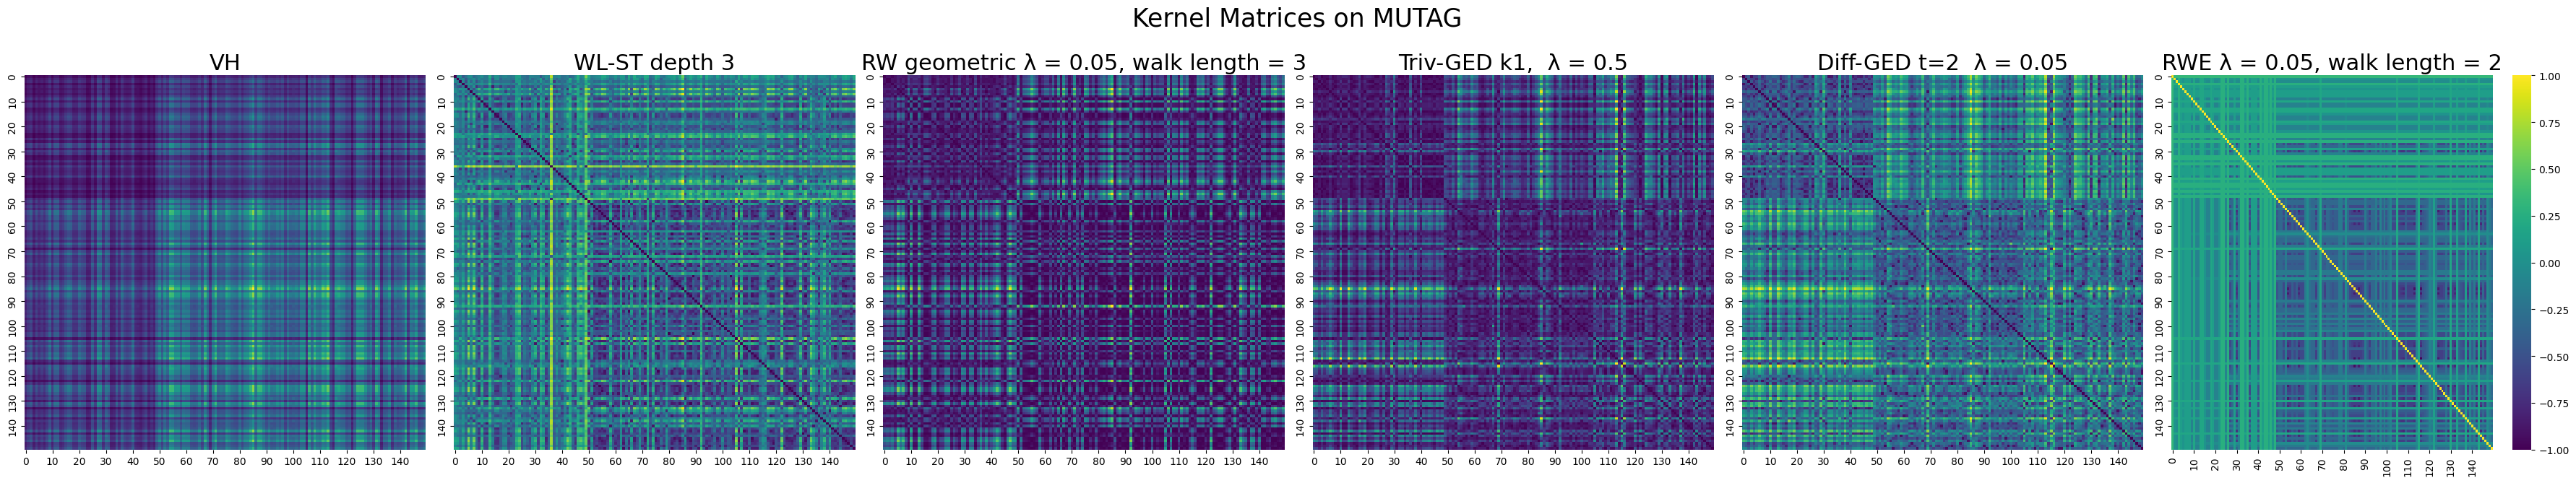

(<Figure size 3600x700 with 7 Axes>,
 array([<Axes: title={'center': 'VH'}>,
        <Axes: title={'center': 'WL-ST depth 3'}>,
        <Axes: title={'center': 'RW geometric λ = 0.05, walk length = 3'}>,
        <Axes: title={'center': 'Triv-GED k1,  λ = 0.5'}>,
        <Axes: title={'center': 'Diff-GED t=2  λ = 0.05'}>,
        <Axes: title={'center': 'RWE λ = 0.05, walk length = 2'}>],
       dtype=object))

In [ ]:
display_heatmaps(heatmaps, titles=[f"{classifier}" for classifier in kernel_names], figsize_per=(6, 7), share_color=True,col_wrap=4)


In [ ]:
test_indices = [int(g.name) for g in X_test]
sorted_test_indices_by_labels = [x for _, x in sorted(zip(y_test, test_indices))]
# sort them by their labels primarily and secondarily by their node count

sorted_test_indices_by_labels_and_size = [test_indices[x] for x in sorted(range(len(test_indices)), key=lambda idx: (y_test[idx], y_test[idx]*len(X_test[idx].nodes())))]




X_test_label_sorted = [DATASET.graphs[idx] for idx in sorted_test_indices_by_labels]
Y_test_label_sorted = [y_test[test_indices.index(idx)] for idx in sorted_test_indices_by_labels]
X_test_sorted = [DATASET.graphs[idx] for idx in sorted_test_indices_by_labels]
Y_test_sorted = [y_test[test_indices.index(idx)] for idx in sorted_test_indices_by_labels]

In [ ]:
import traceback

# Fit all classifiers on the training set and collect predictions on the test set.
# Uses existing variables: get_classifiers, ged_calculator,
# X_train_label_sorted, Y_train_label_sorted, X_test_label_sorted, Y_test_label_sorted

classifiers = get_classifiers(ged_calculator)
classifiers.append(GED_KNN(calculator_id=ged_calculator.get_identifier_name(), ged_bound=GED_BOUND, n_neighbors=3, weights='uniform', algorithm='auto'))
model_names = ["VH-SVC","WL-ST SVC","Triv-GED-SVC k1","Diff-GED-SVC t=2","RWE-SVC","GED-KNN"]
predictions_list = []
errors = []

true_labels = np.array(Y_test_label_sorted)

for clf in classifiers:
    # robust name extraction
    name_attr = getattr(clf, "get_name", None)
    if callable(name_attr):
        try:
            model_name = name_attr()
        except Exception:
            model_name = clf.__class__.__name__
    else:
        model_name = getattr(clf, "name", None) or clf.__class__.__name__

    try:
        clf.fit(X_train_for_graphic, Y_train_for_graphic)
        y_pred = clf.predict(X_test_label_sorted)
        predictions_list.append(np.asarray(y_pred))
        errors.append(None)
    except Exception as e:
        # record the error and append a placeholder prediction array of NaNs
        errors.append(traceback.format_exc())
        predictions_list.append(np.full(len(true_labels), np.nan))

# Convert to a 2D array: shape (n_models, n_tests)
predictions_matrix = np.vstack(predictions_list)

# Quick summary
print("Collected predictions from", len(model_names), "models.")
for i, name in enumerate(model_names):
    status = "ok" if errors[i] is None else "failed"
    print(f"{i:02d}: {name} -> {status}")

# variables available for downstream cells:
# - model_names (list of strings)
# - predictions_matrix (numpy array shape: [n_models, n_test])
# - true_labels (numpy array shape: [n_test])
# - errors (list of None or traceback strings)

100%|█████████▉| 17767/17768.0 [00:02<00:00, 6810.57it/s]
/home/sischuma/Thesis-Code/The-GED-classifier-bakeoff/venv/lib/python3.12/site-packages/grakel/graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')
/home/sischuma/Thesis-Code/The-GED-classifier-bakeoff/venv/lib/python3.12/site-packages/grakel/graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Collected predictions from 6 models.
00: VH-SVC -> ok
01: WL-ST SVC -> ok
02: Triv-GED-SVC k1 -> ok
03: Diff-GED-SVC t=2 -> ok
04: RWE-SVC -> ok
05: GED-KNN -> ok


In [ ]:
# compute TP/TN/FP/FN per model per test sample
preds = np.asarray(predictions_matrix)  # shape: (n_models, n_test)
t = np.asarray(true_labels)             # shape: (n_test,)

n_models, n_test = preds.shape
res = np.empty((n_models, n_test), dtype=object)

POS = 1
NEG = -1

for i in range(n_models):
    p = preds[i]
    nan_mask = np.isnan(p)
    res[i, nan_mask] = 'NA'

    valid = ~nan_mask
    # compute masks
    tp = valid & (p == POS) & (t == POS)
    fp = valid & (p == POS) & (t == NEG)
    tn = valid & (p == NEG) & (t == NEG)
    fn = valid & (p == NEG) & (t == POS)
    other = valid & ~(tp | fp | tn | fn)

    res[i, tp] = 'TP'
    res[i, fp] = 'FP'
    res[i, tn] = 'TN'
    res[i, fn] = 'FN'
    res[i, other] = 'OTHER'

# build a DataFrame with readable column names (use available index lists if present)
if 'sorted_test_indices_by_labels' in globals():
    cols = [str(x) for x in sorted_test_indices_by_labels]
elif 'test_indices' in globals():
    cols = [str(x) for x in test_indices]
else:
    cols = [f"sample_{k}" for k in range(n_test)]

results_df = pd.DataFrame(res, index=model_names, columns=cols)

# counts per model
labels = ['TP', 'TN', 'FP', 'FN', 'NA', 'OTHER']
counts_df = pd.DataFrame(0, index=model_names, columns=labels, dtype=int)
for i, name in enumerate(model_names):
    vals, cnts = np.unique(res[i], return_counts=True)
    for v, c in zip(vals, cnts):
        if v in counts_df.columns:
            counts_df.at[name, v] = c
        else:
            counts_df.at[name, 'OTHER'] += c

# expose for downstream cells
TP_TN_FP_FN_matrix = res           # object array [n_models, n_test]
results_df.name = "per_sample_outcome"
counts_df.name = "per_model_counts"

# quick summary
print(counts_df)

ValueError: Shape of passed values is (7, 38), indices imply (6, 38)

In [ ]:
display(results_df)

,1,2,8,38,65,76,83,99,128,130,...,102,105,111,114,116,120,124,133,152,162
VH-SVC,TN,TN,TN,TN,FP,FP,TN,FP,TN,FP,...,TP,TP,TP,FN,TP,TP,TP,TP,TP,TP
WL-ST SVC,FP,TN,TN,TN,FP,FP,FP,FP,TN,FP,...,TP,TP,TP,TP,TP,TP,TP,TP,TP,TP
Triv-GED-SVC k1,FP,FP,TN,FP,TN,TN,TN,TN,TN,FP,...,TP,TP,TP,FN,TP,TP,TP,TP,TP,TP
Diff-GED-SVC t=2,TN,TN,TN,TN,FP,TN,TN,TN,TN,FP,...,TP,TP,FN,FN,TP,TP,TP,TP,FN,TP
RWE-SVC,TN,TN,TN,TN,TN,TN,TN,TN,TN,FP,...,TP,TP,FN,FN,TP,TP,TP,TP,FN,TP
GED-KNN,TN,TN,TN,TN,TN,TN,TN,TN,TN,FP,...,TP,TP,TP,FN,TP,TP,TP,TP,TP,TP


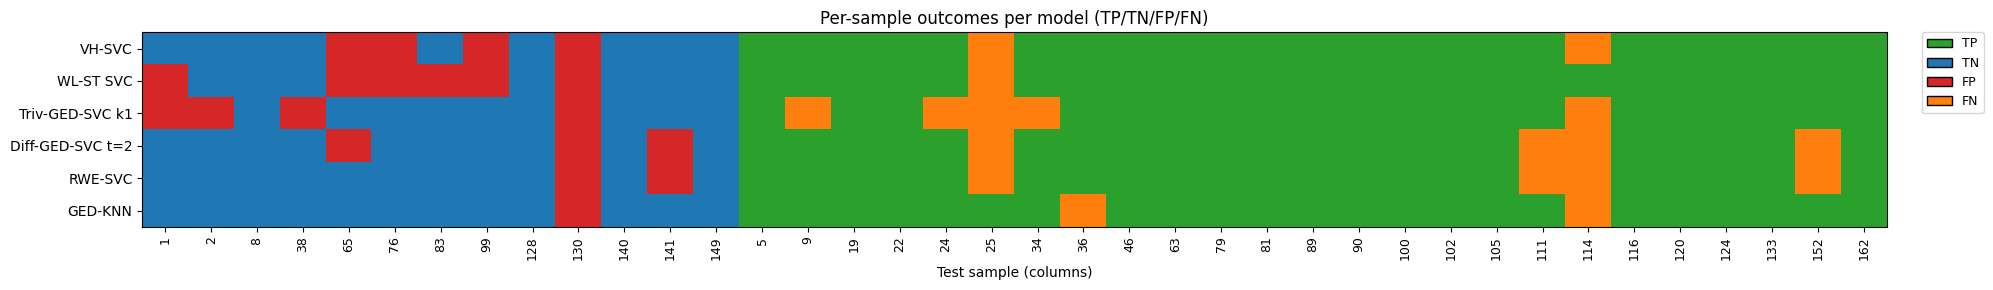

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Horizontal stripes per model showing results_df entries in 4 colors (TP,TN,FP,FN).
# Uses variables already present in the notebook: results_df

import matplotlib.pyplot as plt

# define mapping and colors (4 colors for TP,TN,FP,FN)
label_order = ["TP", "TN", "FP", "FN"]
color_map = {
    "TP": "#2ca02c",   # green
    "TN": "#1f77b4",   # blue
    "FP": "#d62728",   # red
    "FN": "#ff7f0e",   # orange
    "NA": "#7f7f7f",   # grey (if present)
    "OTHER": "#7f7f7f" # grey (if present)
}

# build integer matrix for imshow (map unseen values to a fallback index)
rows = results_df.index.tolist()
cols = results_df.columns.tolist()
n_models = len(rows)
n_samples = len(cols)

fallback_idx = len(label_order)  # index for any fallback (NA/OTHER)
all_colors = [color_map[l] for l in label_order] + ["#7f7f7f"]
cmap = ListedColormap(all_colors)

mat = np.full((n_models, n_samples), fallback_idx, dtype=int)
for i, r in enumerate(rows):
    # use positional indexing to ensure we always get a single row (1D)
    # .loc may return multiple rows if index labels are duplicated
    row_vals = results_df.iloc[i].values
    for j, v in enumerate(row_vals):
        if v in label_order:
            mat[i, j] = label_order.index(v)
        elif v in color_map:
            # NA/OTHER -> fallback index (last color)
            mat[i, j] = fallback_idx
        else:
            mat[i, j] = fallback_idx

# plot
fig_h = max(2.0, 0.5 * n_models)  # reasonable height scaling
fig, ax = plt.subplots(figsize=(min(20, 1* n_samples + 3), fig_h))
im = ax.imshow(mat, aspect='auto', cmap=cmap, vmin=0, vmax=len(all_colors)-1)

# labels and ticks
ax.set_yticks(np.arange(n_models))
ax.set_yticklabels(rows, fontsize=10)
ax.set_xticks(np.arange(n_samples))
# show only a subset of xticks if many samples
if n_samples > 40:
    step = max(1, n_samples // 40)
    ax.set_xticks(np.arange(0, n_samples, step))
    ax.set_xticklabels([cols[k] for k in range(0, n_samples, step)], rotation=90, fontsize=8)
else:
    ax.set_xticklabels(cols, rotation=90, fontsize=9)

ax.set_xlabel("Test sample (columns)")
ax.set_title("Per-sample outcomes per model (TP/TN/FP/FN)")

# legend
legend_handles = [Patch(facecolor=color_map[k], edgecolor='k', label=k) for k in label_order]
# append NA/OTHER if present in matrix
if np.any(mat == fallback_idx):
    legend_handles.append(Patch(facecolor="#7f7f7f", edgecolor='k', label="NA/OTHER"))
ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=9)

plt.tight_layout()
plt.savefig(f"per_sample_outcomes_{DATASET_NAME}_{randomseed}.pdf", bbox_inches='tight')
plt.show()

In [ ]:
# fit the model and get the lagrgange multipliers
ged_matrix_train = ged_calculator.get_complete_matrix(method=GED_BOUND,x_graphindexes=indizies_for_graphic, y_graphindexes=indizies_for_graphic)
classifier.fit(X_train_for_graphic, Y_train_for_graphic)
# get the lagrange multipliers
lambdas = classifier.classifier.support_
support_weights = classifier.classifier.dual_coef_
# map the support weights to the original indices
weights_for_indices = np.zeros(len(X_train_for_graphic))
for support_idx, original_idx in enumerate(classifier.classifier.support_):
    weights_for_indices[original_idx] = support_weights[0][support_idx]

display(lambdas)
display(support_weights)
display(weights_for_indices)


array([  2,   6,   8,  15,  18,  29,  31,  36,  39,  41,  43,  44,  45,
        46,  47,  49,  57,  72,  80,  82,  93,  95, 103, 105, 109, 110,
       111, 116, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 135,
       137, 138, 139, 141, 143, 144, 145, 146, 149], dtype=int32)

array([[-1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 ,
        -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 ,  0.75,  0.75,
         0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,
         0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,
         0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,
         0.75,  0.75,  0.75]])

array([ 0.  ,  0.  , -1.5 ,  0.  ,  0.  ,  0.  , -1.5 ,  0.  , -1.5 ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -1.5 ,  0.  ,  0.  ,
       -1.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  , -1.5 ,  0.  , -1.5 ,  0.  ,  0.  ,  0.  ,  0.  ,
       -1.5 ,  0.  ,  0.  , -1.5 ,  0.  , -1.5 ,  0.  , -1.5 , -1.5 ,
       -1.5 , -1.5 , -1.5 ,  0.  , -1.5 ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.75,
        0.  ,  0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.75,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.75,  0.  ,  0.  ,
        0.  ,  0.75,  0.75,  0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.75,
        0.  ,  0.  ,  0.  ,  0.75,  0.75,  0.75,  0.75,  0.75,  0.  ,
        0.75,  0.75,

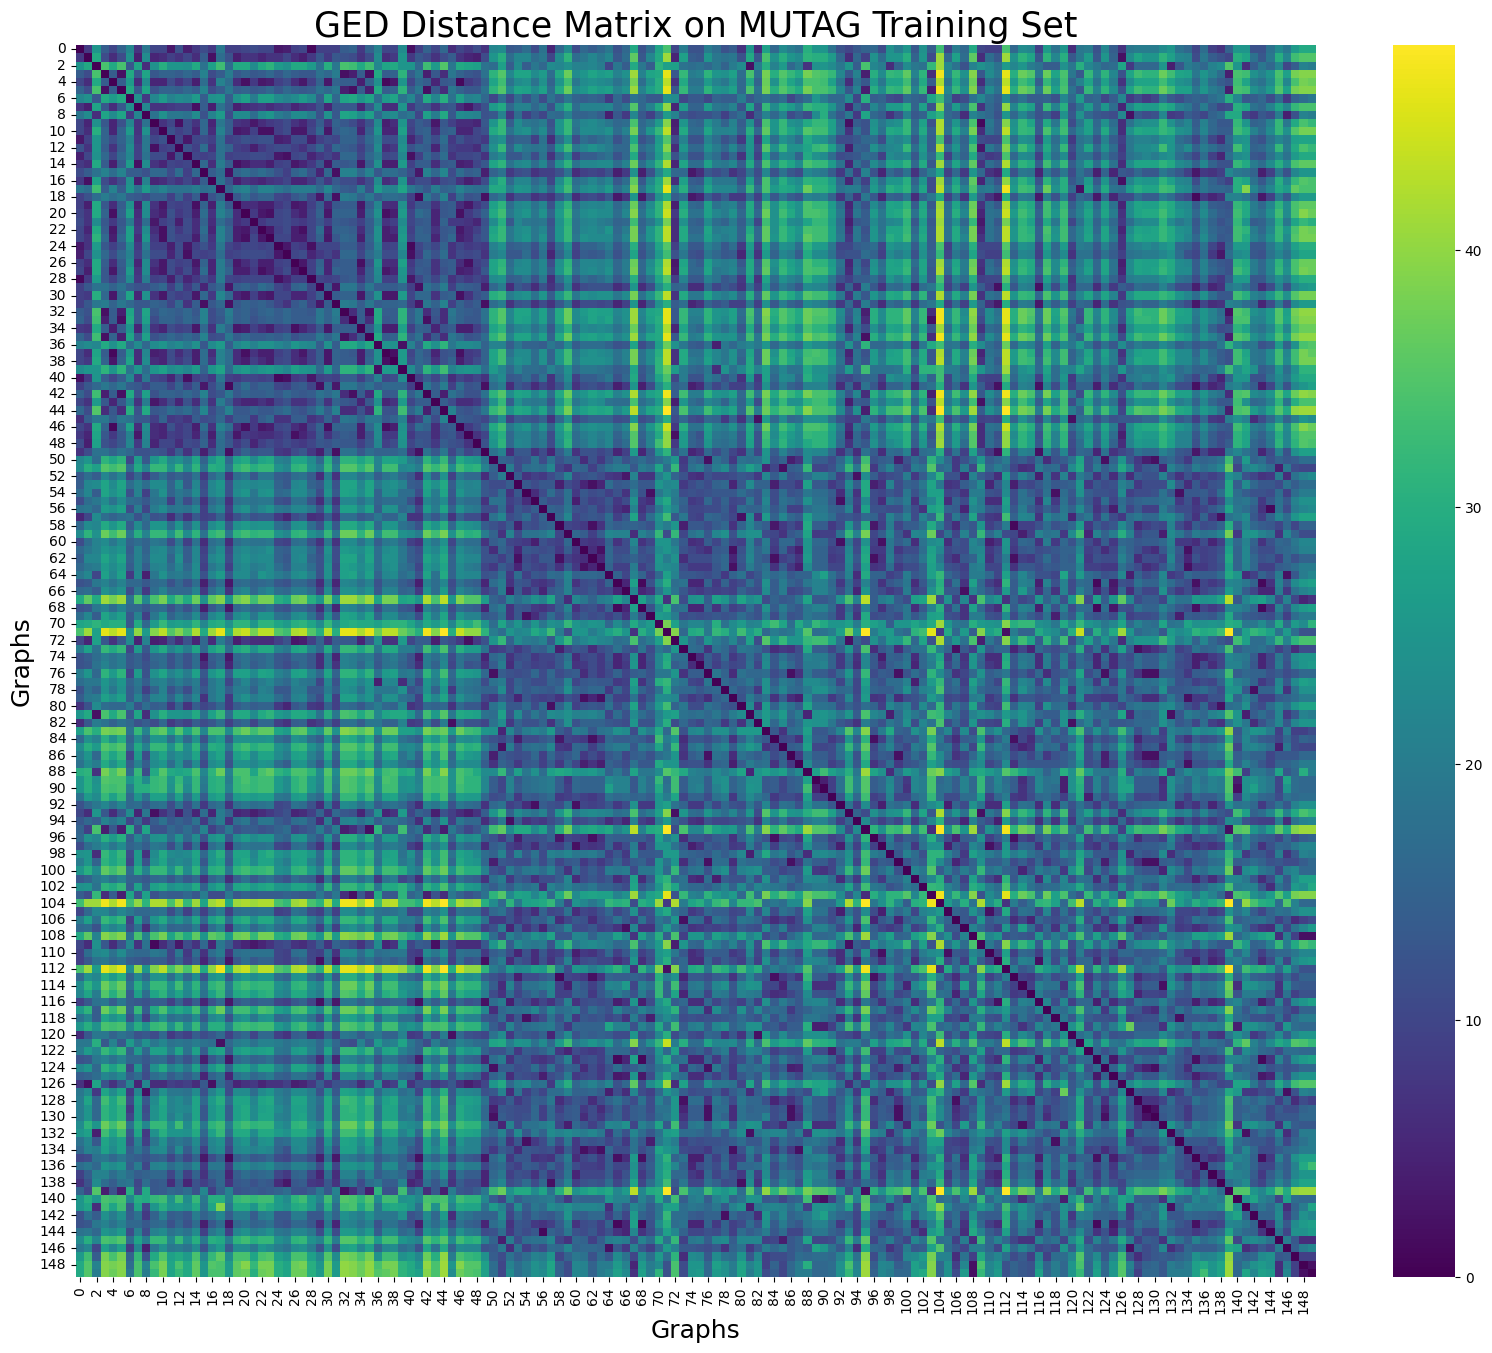

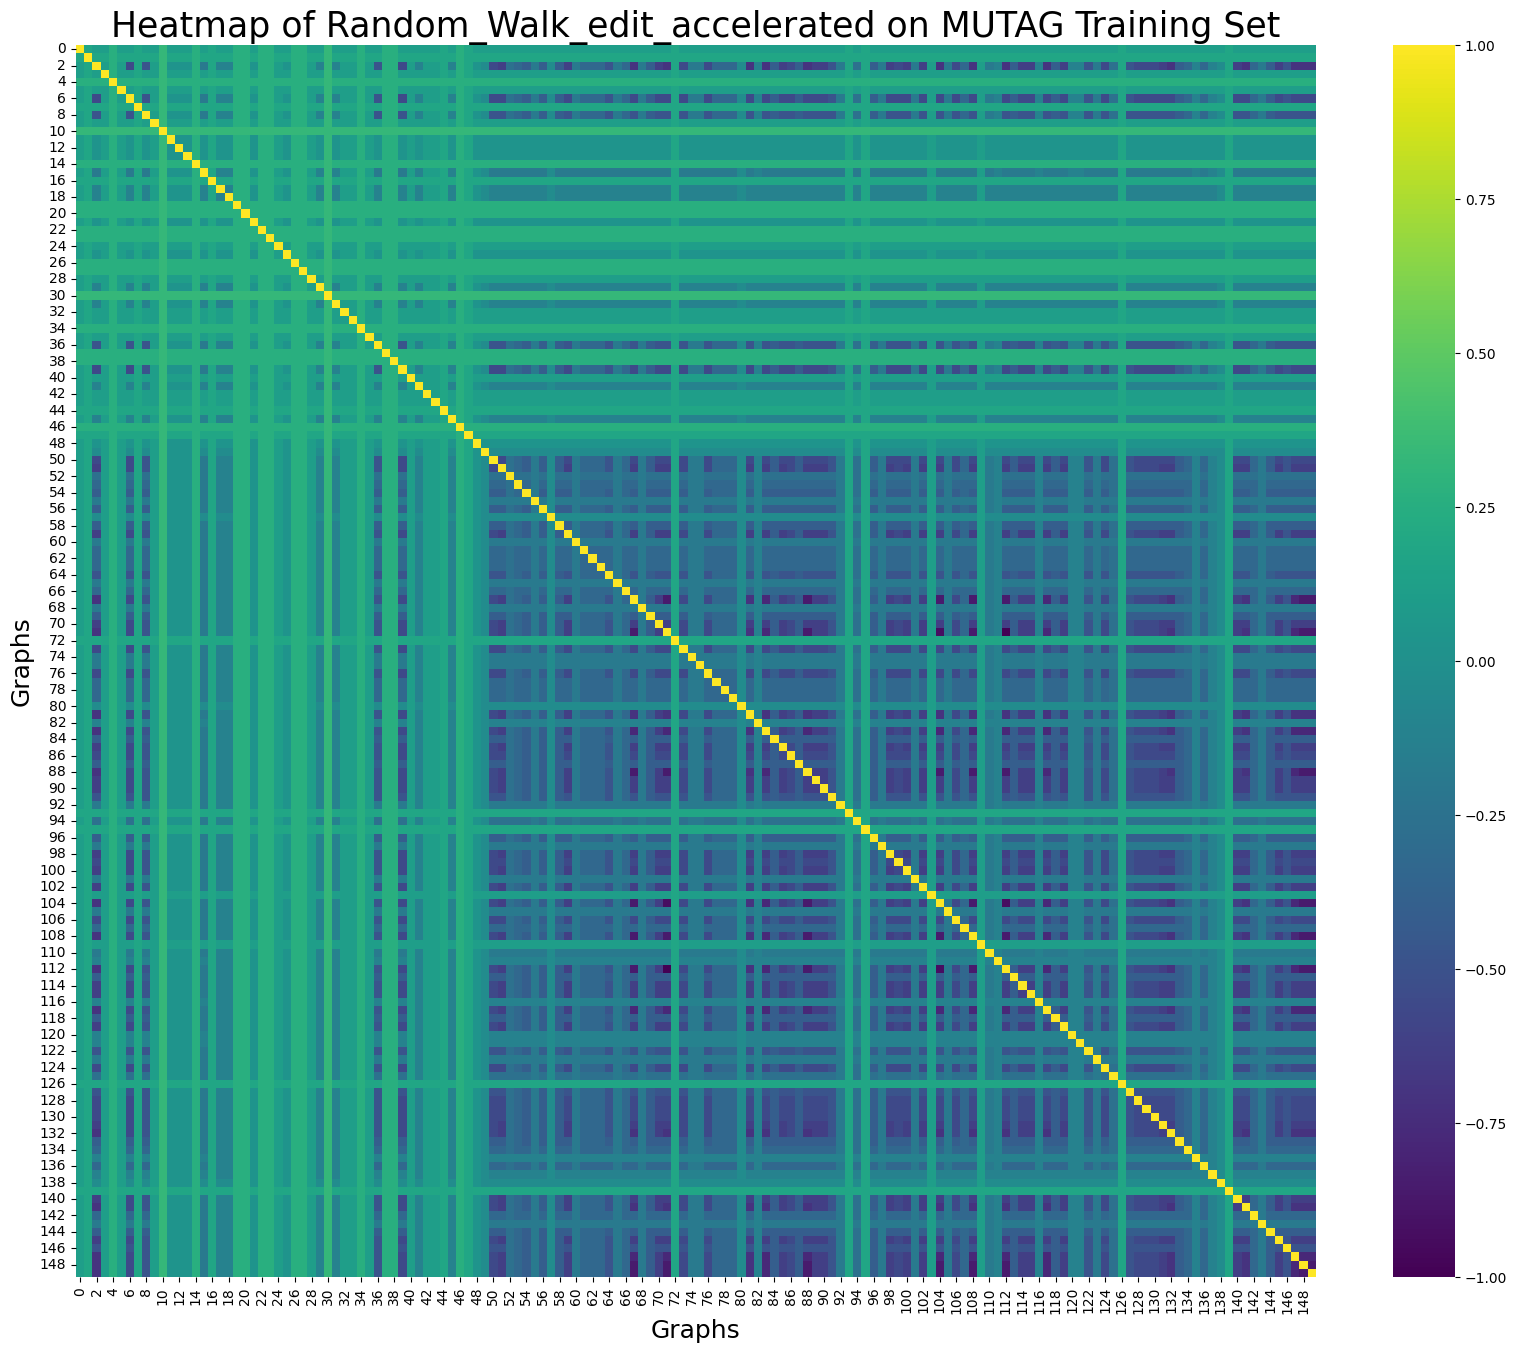

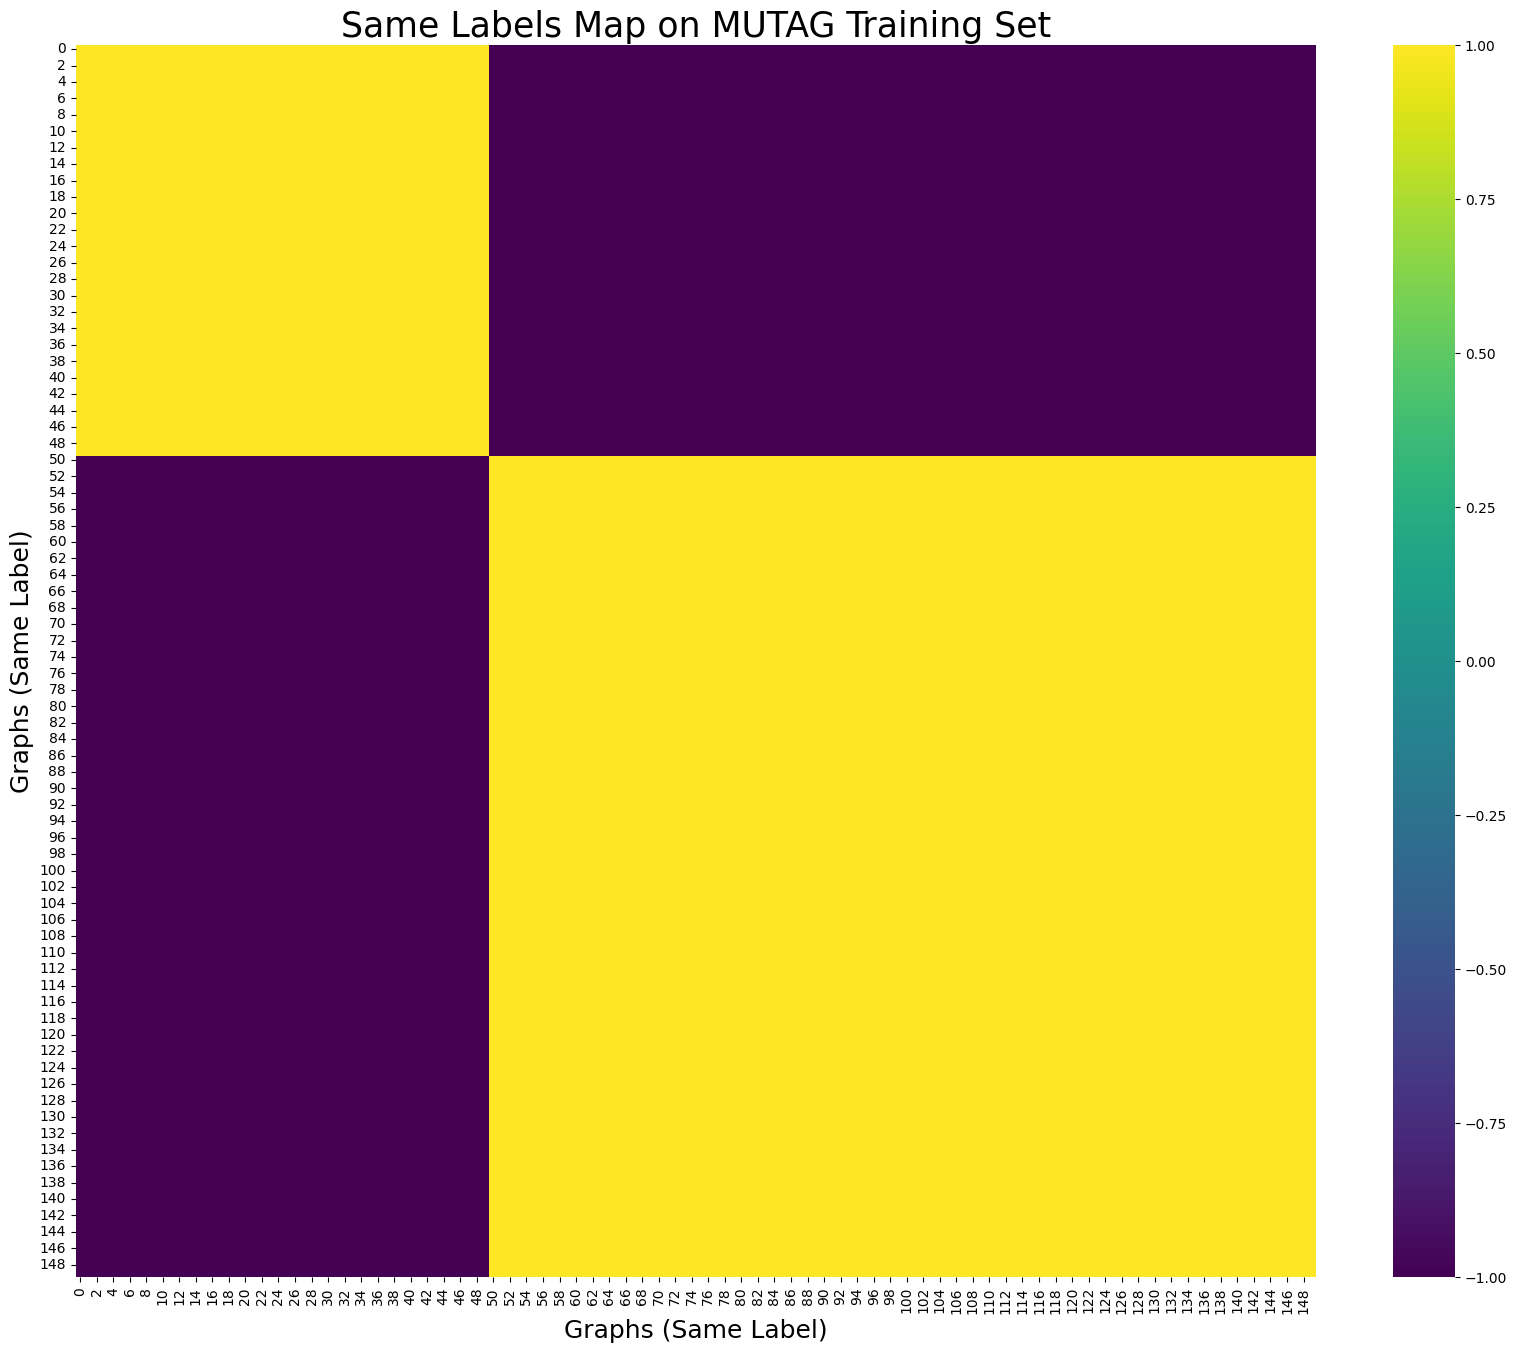

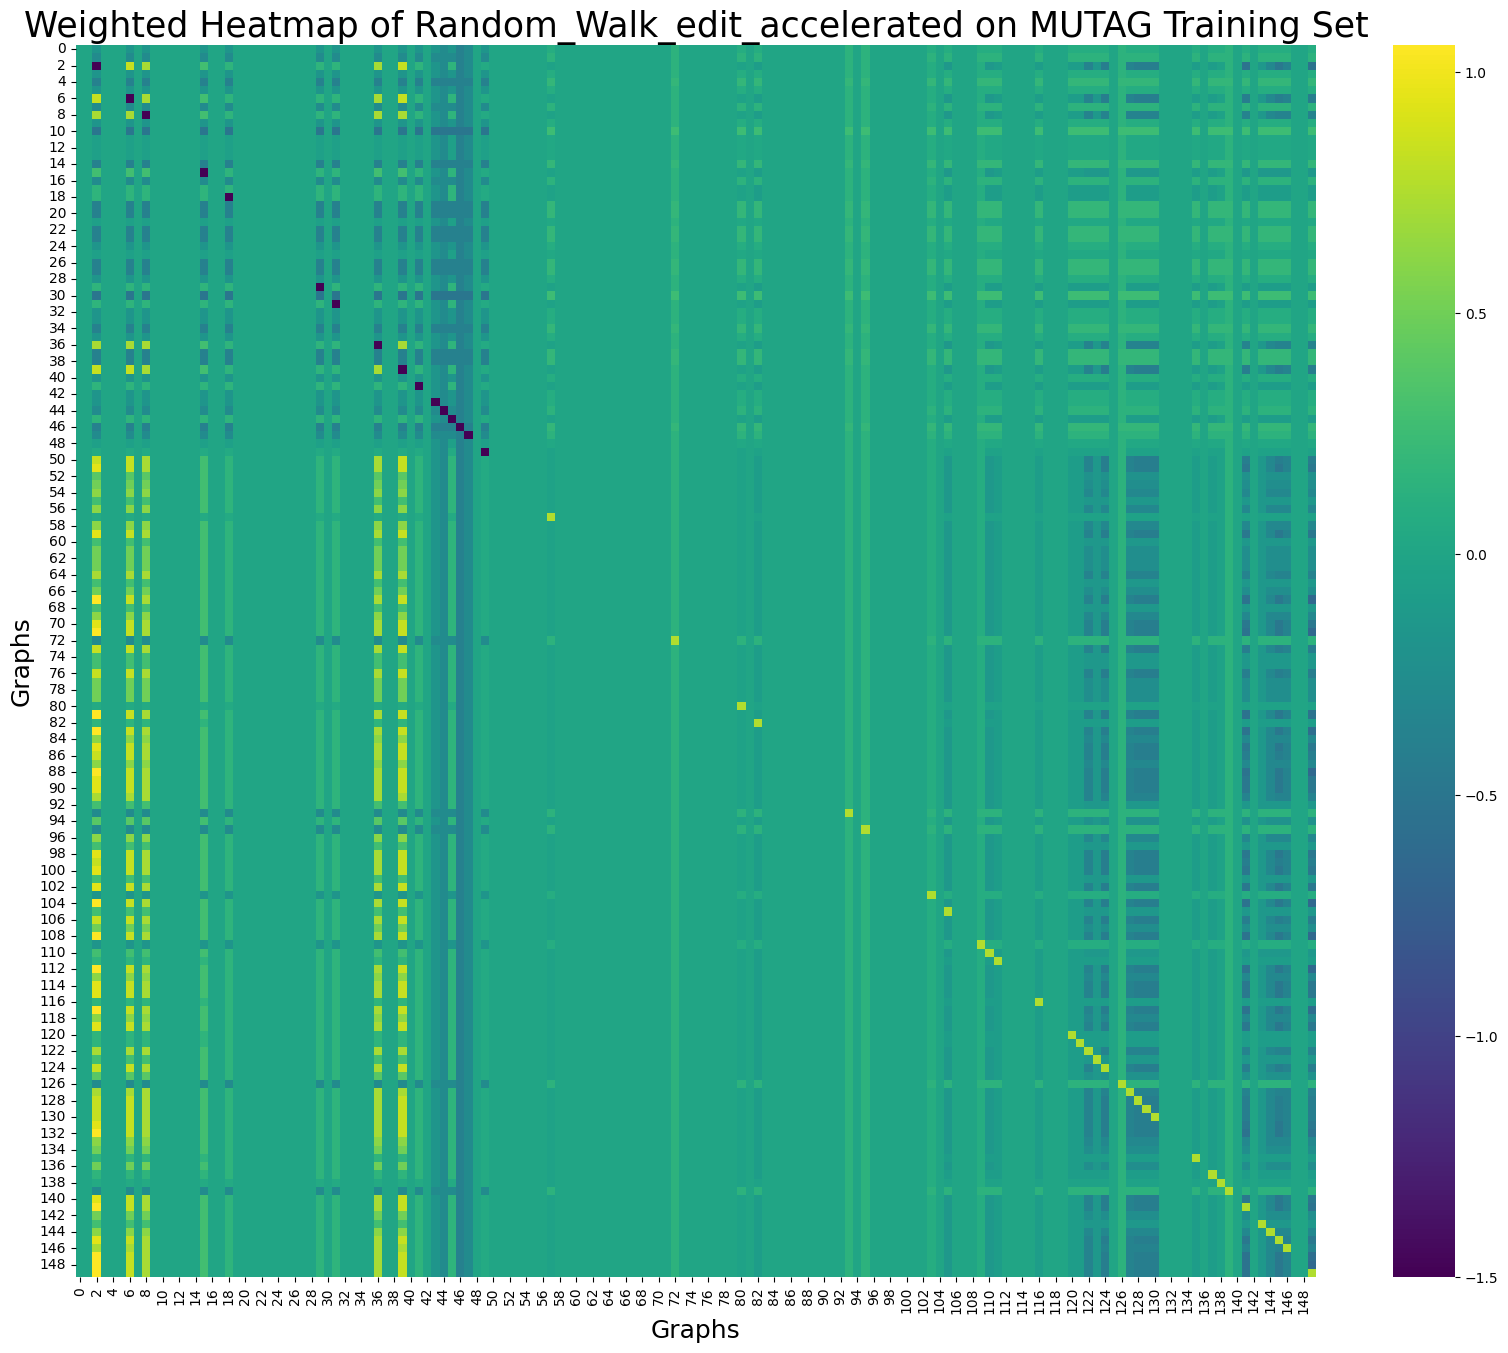

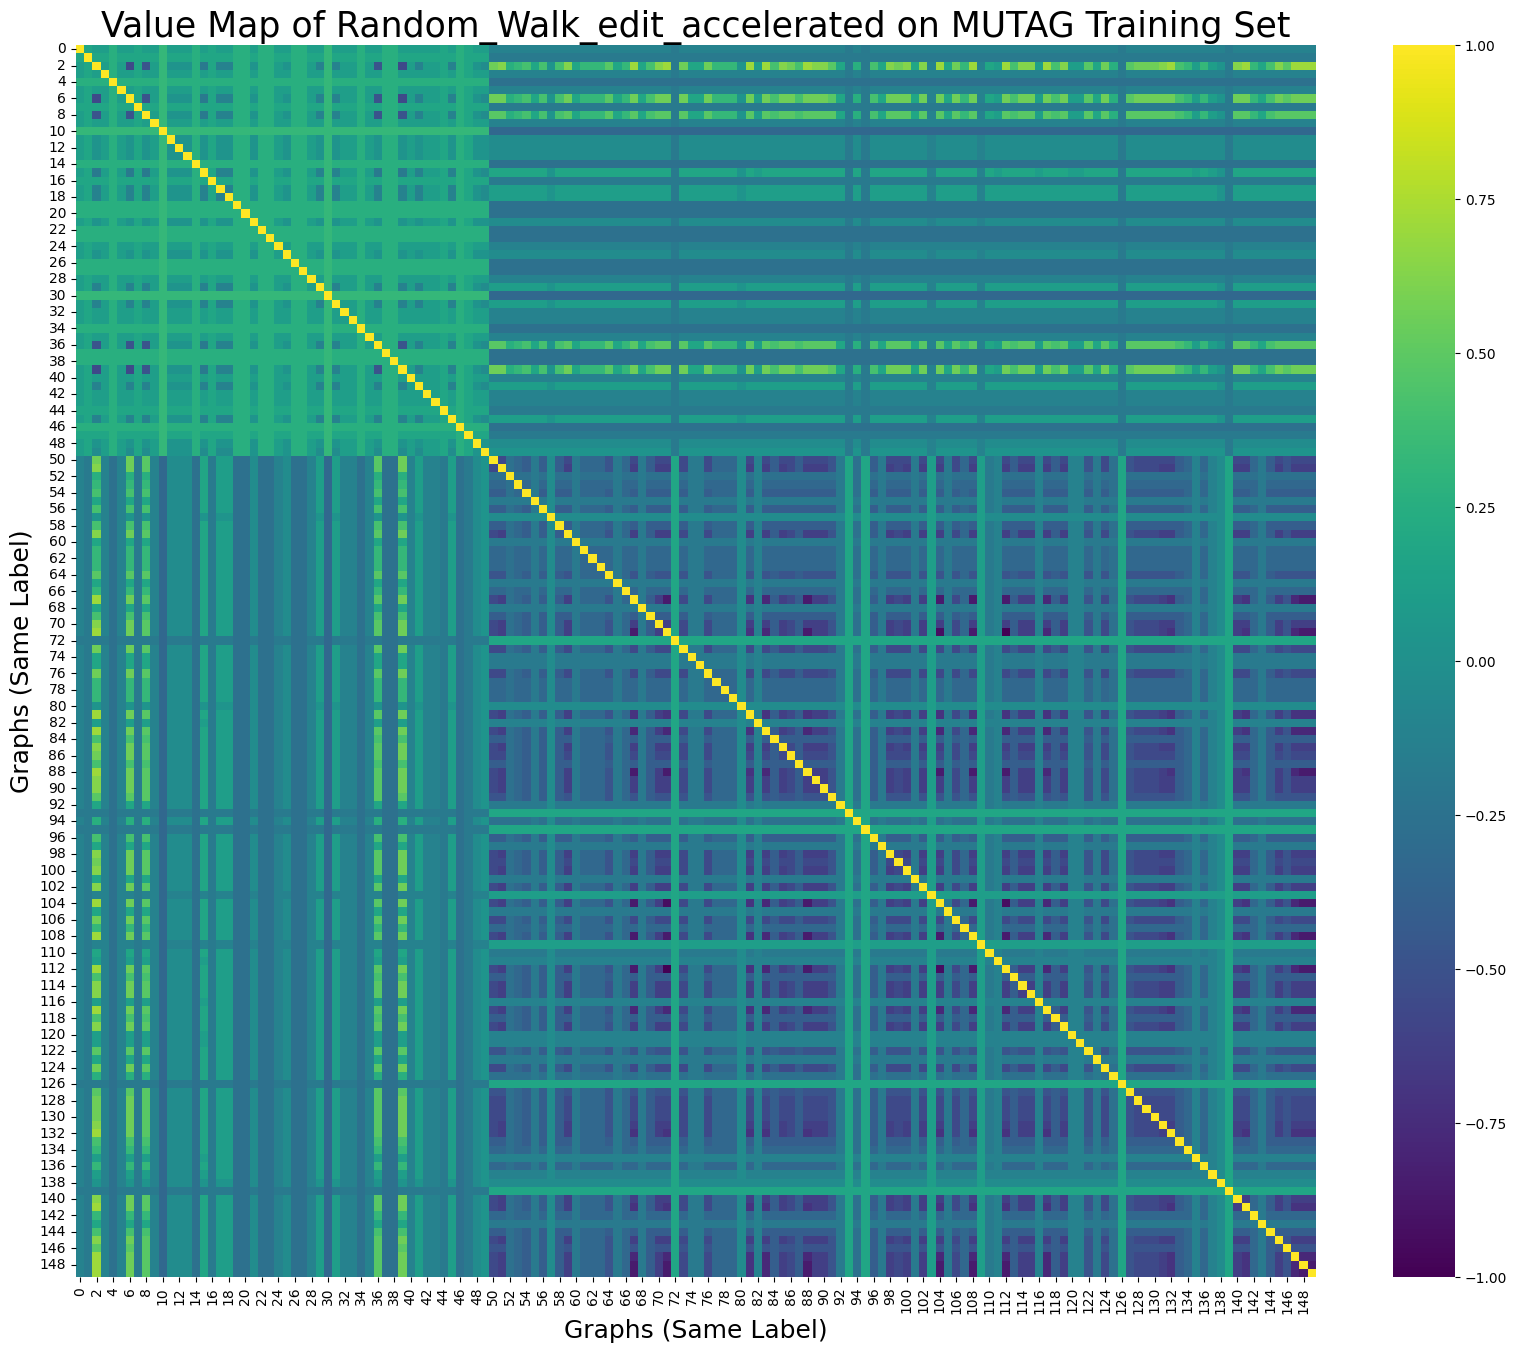

<Axes: title={'center': 'Value Map of Random_Walk_edit_accelerated on MUTAG Training Set'}, xlabel='Graphs (Same Label)', ylabel='Graphs (Same Label)'>

In [ ]:

display_heatmap(ged_matrix_train, title=f"GED Distance Matrix on {DATASET.name} Training Set")
# sort the heatmap on on axis by node size

display_heatmap(heatmap, title=f"Heatmap of {classifier.__class__.__name__} on {DATASET.name} Training Set")
display_heatmap(sorted_labels_map_graphic, title=f"Same Labels Map on {DATASET.name} Training Set", xlabel="Graphs (Same Label)", ylabel="Graphs (Same Label)")
# weighted Heatmap with the dualange multipliers
weighted_heatmap = heatmap * weights_for_indices
display_heatmap(weighted_heatmap, title=f"Weighted Heatmap of {classifier.__class__.__name__} on {DATASET.name} Training Set", xlabel="Graphs", ylabel="Graphs")    
# display_heatmap([y_train], title="labels of the training set")
value_map=heatmap * sorted_labels_map_graphic
display_heatmap(value_map, title=f"Value Map of {classifier.__class__.__name__} on {DATASET.name} Training Set", xlabel="Graphs (Same Label)", ylabel="Graphs (Same Label)")


# have the model predict on the train set 


In [ ]:
# now the heatpmaps for the test data to the train data

# sort the test data by their labels primarily and secondarily by their node count
test_indices = [int(g.name) for g in X_test]
# sort the indices by their orginal order
sorted_test_indices = sorted(test_indices)
#also sort them by their labels
sorted_test_indices_by_labels = [x for _, x in sorted(zip(y_test, test_indices))]
# sort them by their labels primarily and secondarily by their node count

sorted_test_indices_by_labels_and_size = [test_indices[x] for x in sorted(range(len(test_indices)), key=lambda idx: (y_test[idx], y_test[idx]*len(X_test[idx].nodes())))]




X_test_label_sorted = [DATASET.graphs[idx] for idx in sorted_test_indices_by_labels_and_size]
Y_test_label_sorted = [y_test[test_indices.index(idx)] for idx in sorted_test_indices_by_labels_and_size]
X_test_sorted = [DATASET.graphs[idx] for idx in sorted_test_indices_by_labels_and_size]
Y_test_sorted = [y_test[test_indices.index(idx)] for idx in sorted_test_indices_by_labels_and_size]
# get the test_matrix

labels_map =np.zeros((len(y_test), len(y_train)))
for i in range(len(y_test   )):
    for j in range(len(y_train)):
        if y_test[i] == y_train[j]:
            labels_map[i][j] = 1
        else:
            labels_map[i][j] = -1

sorted_labels_map =np.zeros((len(Y_test_label_sorted), len(Y_train_label_sorted_labels)))
for i in range(len(Y_test_label_sorted)):
    for j in range(len(Y_train_label_sorted_labels)):
        if Y_test_label_sorted[i] == Y_train_label_sorted_labels[j]:
            sorted_labels_map[i][j] = 1
        else:
            sorted_labels_map[i][j] = -1



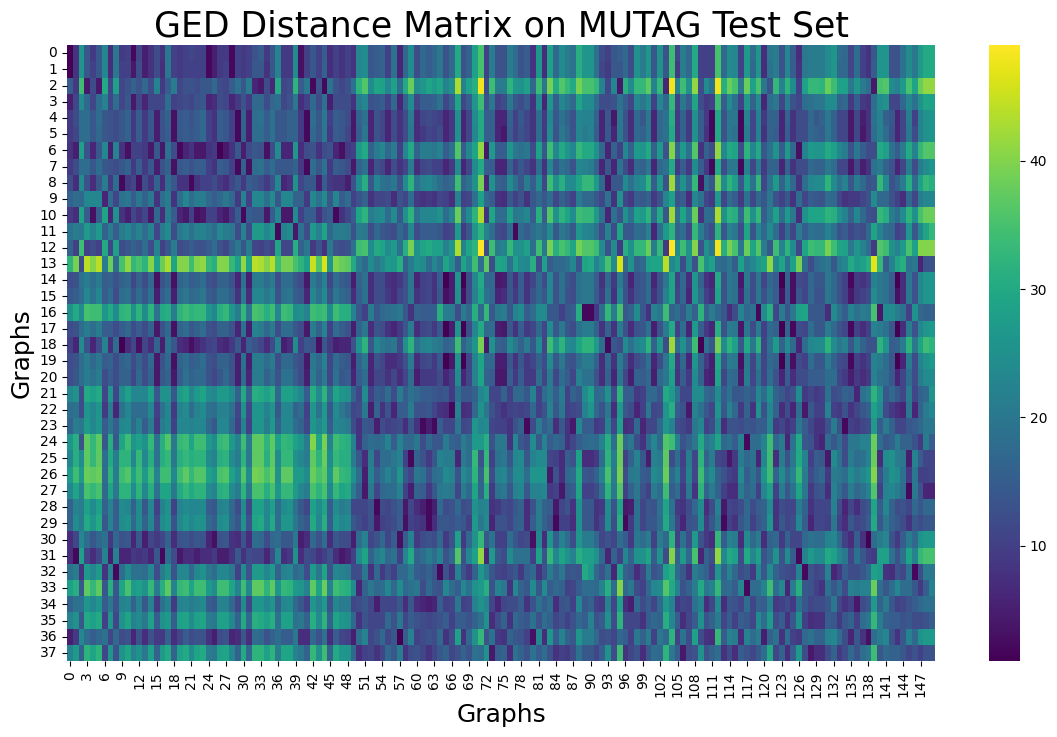

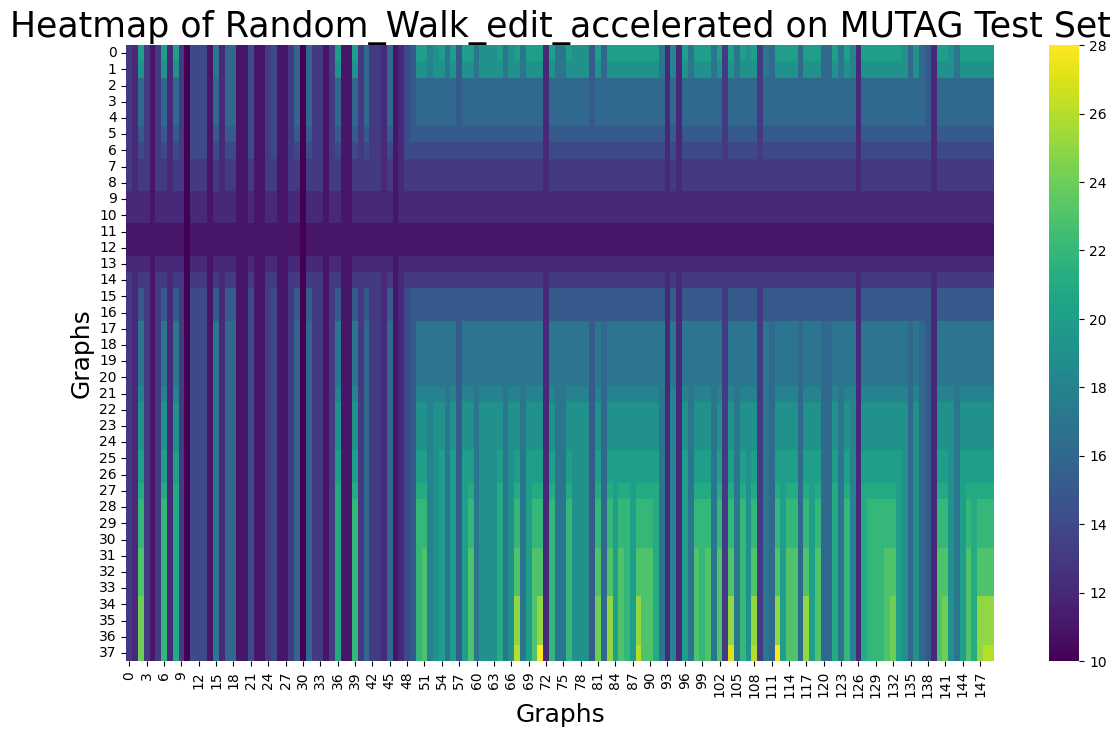

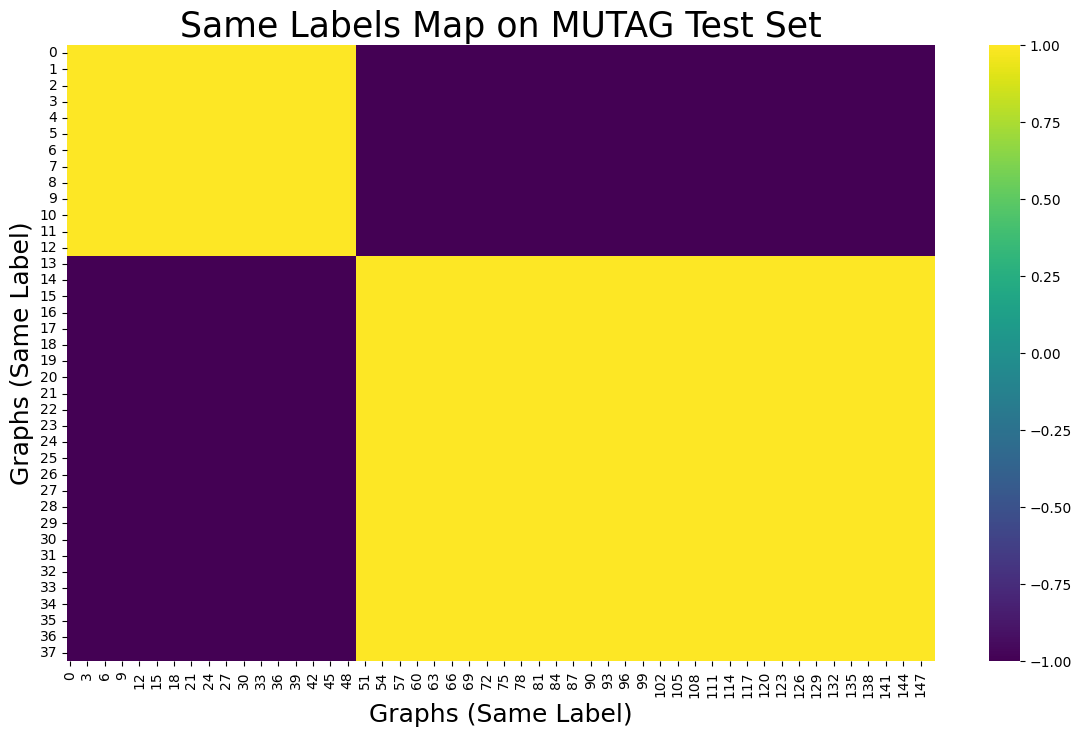

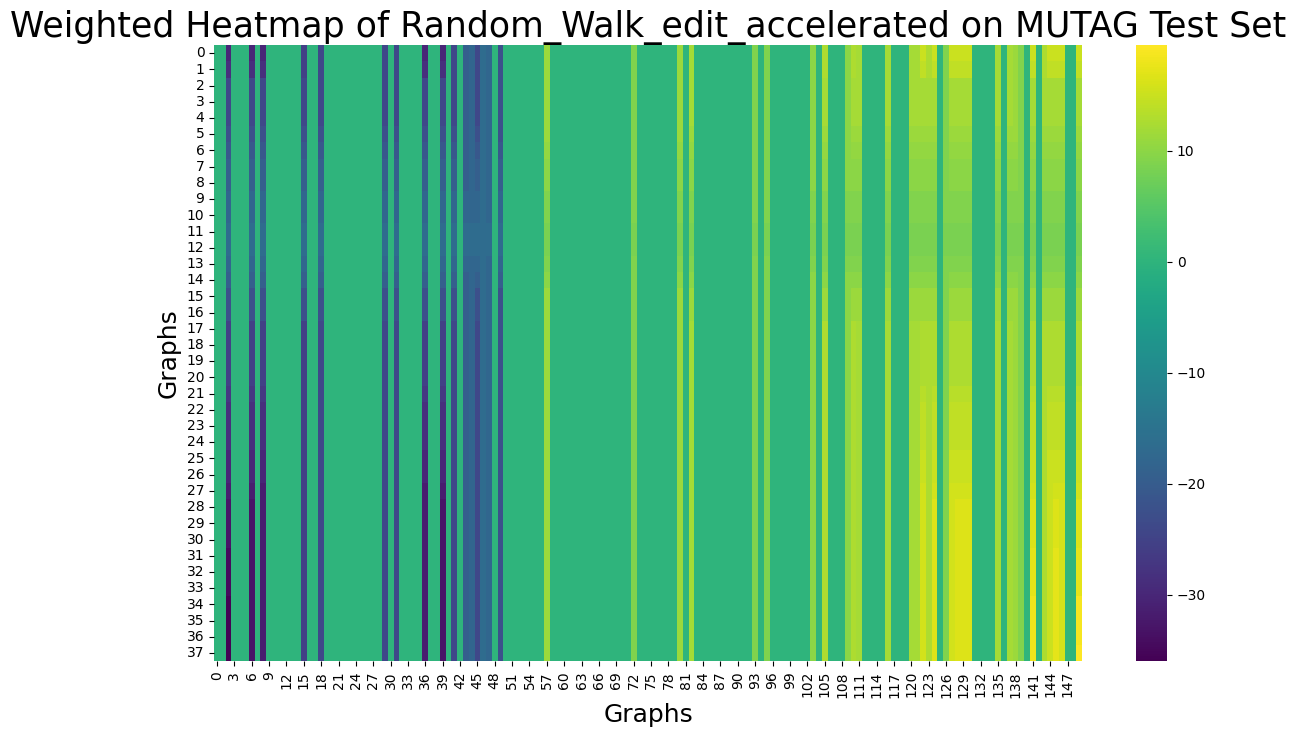

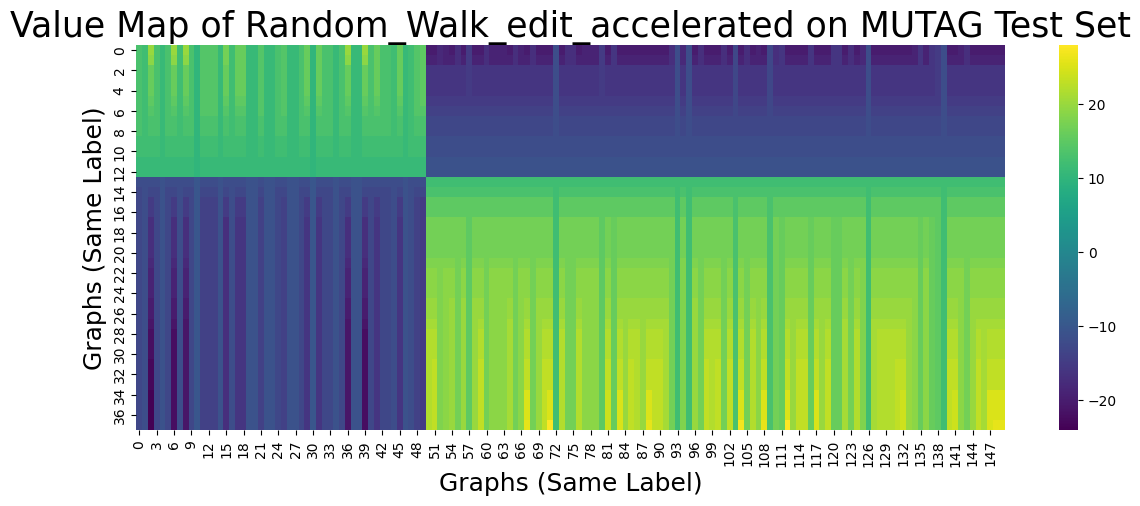

<Axes: title={'center': 'Value Map of Random_Walk_edit_accelerated on MUTAG Test Set'}, xlabel='Graphs (Same Label)', ylabel='Graphs (Same Label)'>

In [ ]:
ged_matrix_test = ged_calculator.get_complete_matrix(method=GED_BOUND,x_graphindexes=sorted_test_indices_by_labels, y_graphindexes=sorted_train_indices_by_labels)
display_heatmap(ged_matrix_test, title=f"GED Distance Matrix on {DATASET.name} Test Set",figsize=(14, 8))
heatmap_test = classifier.transform(X_test_label_sorted)
display_heatmap(heatmap_test, title=f"Heatmap of {classifier.__class__.__name__} on {DATASET.name} Test Set", figsize=(14, 8))
display_heatmap(sorted_labels_map, title=f"Same Labels Map on {DATASET.name} Test Set", xlabel="Graphs (Same Label)", ylabel="Graphs (Same Label)", figsize=(14, 8))
# weighted Heatmap with the dualange multipliers
weighted_heatmap_test = heatmap_test * weights_for_indices
display_heatmap(weighted_heatmap_test, title=f"Weighted Heatmap of {classifier.__class__.__name__} on {DATASET.name} Test Set", xlabel="Graphs", ylabel="Graphs", figsize=(14, 8))
# display_heatmap([y_train], title="labels of the training set")
value_map=heatmap_test * sorted_labels_map
display_heatmap(value_map, title=f"Value Map of {classifier.__class__.__name__} on {DATASET.name} Test Set", xlabel="Graphs (Same Label)", ylabel="Graphs (Same Label)", figsize=(14, 5))


In [ ]:
classifier.fit(X_train_label_sorted, Y_train_label_sorted)

NameError: name 'X_train_label_sorted' is not defined

In [ ]:
# get predictions for the test set
y_pred = classifier.predict(X_test_label_sorted)
y_pred_probabilities = classifier.predict_proba(X_test_label_sorted)
# where the predictions are correct 1 else 0
correct_predictions = (y_pred == Y_test_label_sorted).astype(int)
# create a heatmap of the kernel matrix (heatmap_test), where the incorrect predictions are highlighted
incorrect_predictions = (y_pred != Y_test_label_sorted).astype(int)
# fist visualize the incorrect predictions as a heatmap
display_heatmap(incorrect_predictions, title="Incorrect Predictions Map", xlabel="Graphs", ylabel="Graphs", figsize=(14, 2))

# than use the incorrect_predictions to highlight the columns in the heatmap
display_heatmap(heatmap_test, title=f"Incorrect Predictions Heatmap on {DATASET.name} Test Set", xlabel="Graphs", ylabel="Graphs", figsize=(14, 5), highlight_rows=np.where(incorrect_predictions == 1)[0], highlight_color='black', alpha=0.3, linewidth=1)

# visualize the predictions as a heatmap
display_heatmap(heatmap_test, title=f"Correct Predictions Heatmap on {DATASET.name} Test Set", xlabel="Graphs", ylabel="Graphs", figsize=(14, 5), highlight_rows=np.where(correct_predictions == 1)[0], highlight_color='black', alpha=0.3, linewidth=1)
